In [1]:
import sys, os
sys.path.append(os.path.abspath(os.path.join('..')))
from Code.descent_methods import *
from Code.utilities import train_test_split, plot_test_results

# analytic gradient methods
from Code.utilities import OLS_train_analgrad, MSELoss_method

# Import tools from the first project 
from Code.project1_tools import feature_matrix_2d, r2_sampling, plot_surface, scale_feature_matrix

import numpy as np

In [2]:
# Initialise beta
num_features = 7
beta0 = {"b" : np.random.random(num_features)}

# Start with small values
beta0 = {"b" : np.random.random(num_features)*0.1}

# beta0 = {"b" : 0*np.random.random(num_features)}


# Sample points and split in train and test
num_points = 200
split=0.5
data = r2_sampling(num_points, sigma2=0.3)
x, y, z = data["x"], data["y"], data["z"]
X = feature_matrix_2d(x, y, num_features)
X, means, var = scale_feature_matrix(X)
X_train, y_train, X_test, y_test, test_index = train_test_split(X, z, split)

### TODO: dette er en quickfix...
y_train, y_test = np.squeeze(y_train), np.squeeze(y_test)

# Number of of minibatch when using batch size 10
m = int(len(y_train) / 10) 
epochs = 20

# Define the polynomial fit model
def model(beta, X):
    # print(beta)
    return np.dot(X, beta["b"])

loss_func = MSELoss_method(model)
loss_grad = OLS_train_analgrad(model)

### Plain GD

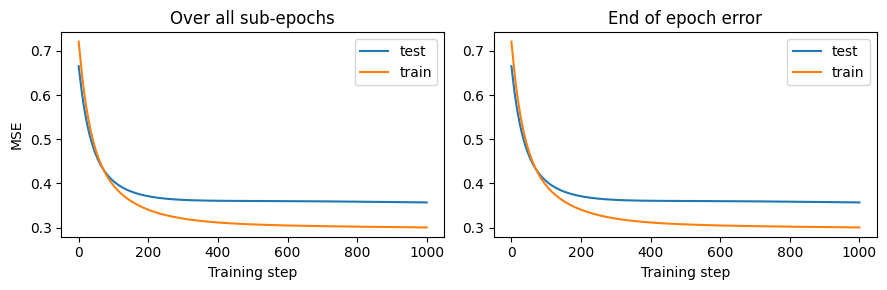

In [18]:
result_GD = GD(X_train, y_train, X_test, y_test, grad_method=loss_grad, beta0=beta0, test_loss_func=loss_func,
               n_epochs=1000, lr=0.2, gamma=0.1)
plot_test_results(result_GD["test_loss_list"], result_GD["train_loss_list"], 1)

### Stochastic

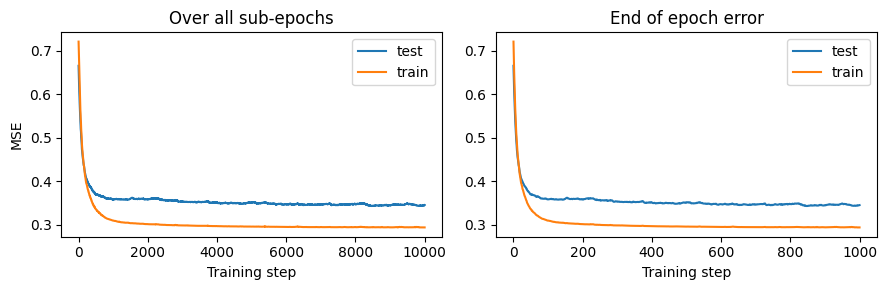

In [4]:
result_SGD = SGD(X_train, y_train, X_test, y_test, grad_method=loss_grad, beta0=beta0, test_loss_func=loss_func,
                 n_epochs=1000, gamma=0)
plot_test_results(result_SGD["test_loss_list"], result_SGD["train_loss_list"], m)

### Adagrad

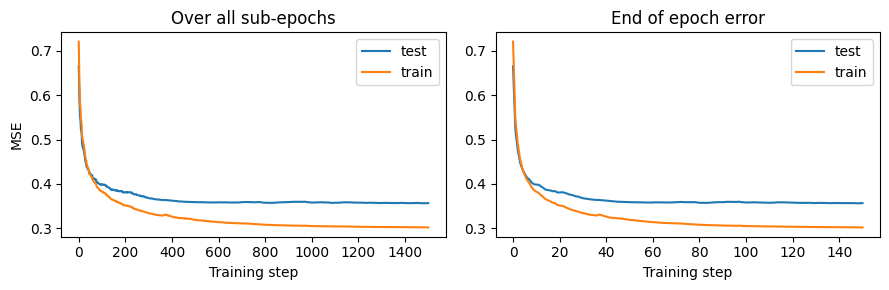

In [5]:
result_adagrad = SGD_adagrad(X_train, y_train, X_test, y_test, grad_method=loss_grad, beta0=beta0, test_loss_func=loss_func,
                             n_epochs=150)
plot_test_results(result_adagrad["test_loss_list"], result_adagrad["train_loss_list"], m)

### RMS prop

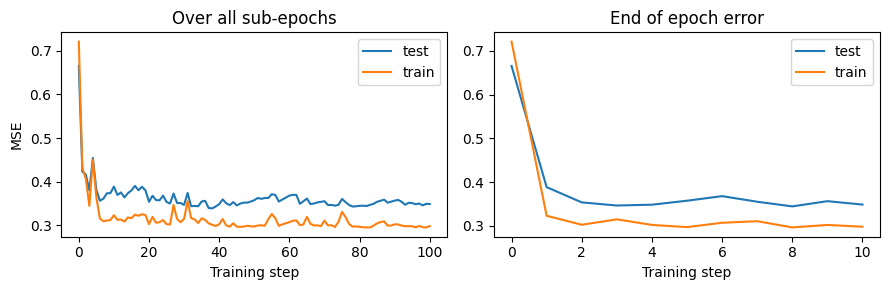

In [6]:
result_RMS_prop = SGD_RMS_prop(X_train, y_train, X_test, y_test, grad_method=loss_grad, beta0=beta0, test_loss_func=loss_func,
                               n_epochs=10)
plot_test_results(result_RMS_prop["test_loss_list"], result_RMS_prop["train_loss_list"], m)

### Adam

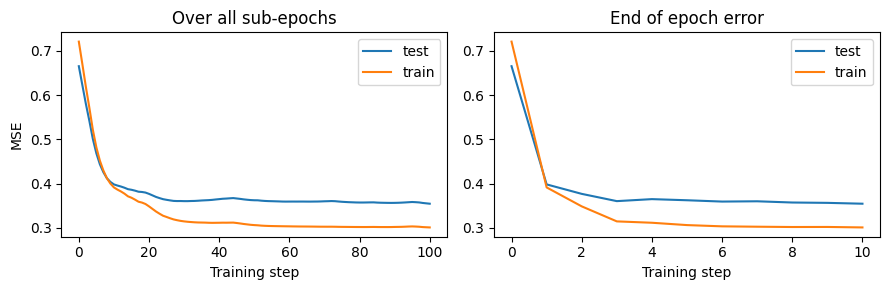

In [7]:
result_adam = SGD_adam(X_train, y_train, X_test, y_test, grad_method=loss_grad, beta0=beta0, test_loss_func=loss_func,
                       n_epochs=10)
plot_test_results(result_adam["test_loss_list"], result_adam["train_loss_list"], m)

### A plot of the final result

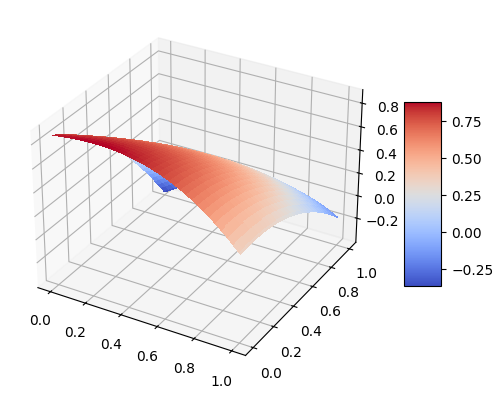

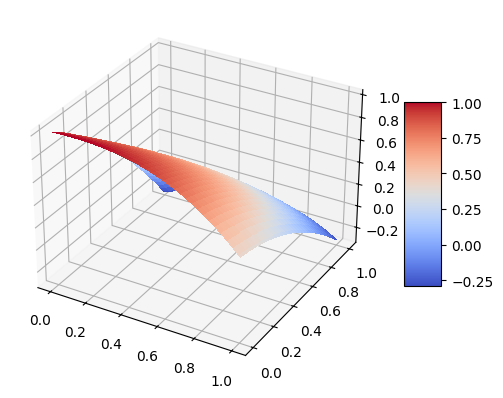

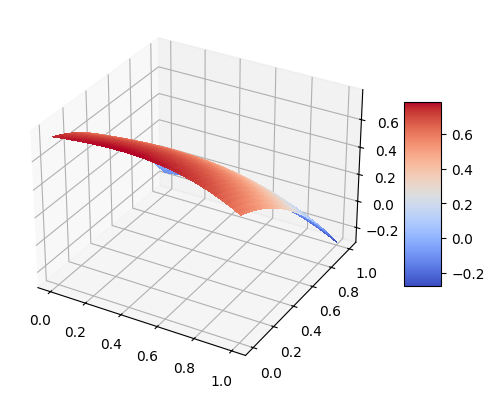

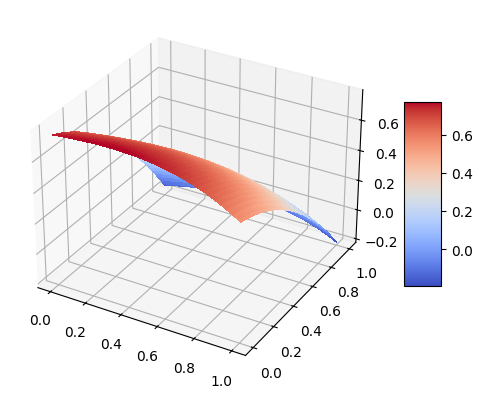

In [16]:
import matplotlib.pyplot as plt

def plot_franke_prediction(model, beta, filename=None):

    # Number of points to use
    num_plot = 101

    # Make data.
    x = np.linspace(0, 1, num_plot).reshape((num_plot, 1))
    y = np.linspace(0, 1, num_plot).reshape((num_plot, 1))

    x_mesh = np.zeros(shape=(num_plot*num_plot, 1))
    y_mesh = np.zeros(shape=(num_plot*num_plot, 1))

    for i in range(num_plot):
        for j in range(num_plot):
            x_mesh[j*num_plot + i] = x[i, 0]
            y_mesh[j*num_plot + i] = y[j, 0]
    
    # Feature matrix of points to plot
    X = feature_matrix_2d(x_mesh, y_mesh, len(beta["b"]))
    X, _, _ = scale_feature_matrix(X)

    # Make prediction
    z = model(beta, X)
    # Reshape
    x_mesh = x_mesh.reshape(num_plot, num_plot)
    y_mesh = y_mesh.reshape(num_plot, num_plot)
    z_mesh = z.reshape(num_plot, num_plot)

    # Plot surface
    plot_surface(x_mesh,y_mesh,z_mesh, filename=filename)

plot_franke_prediction(model, result_SGD["beta_final"])
plot_franke_prediction(model, result_RMS_prop["beta_final"])
plot_franke_prediction(model, result_adagrad["beta_final"])
plot_franke_prediction(model, result_adam["beta_final"])